In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("../data/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
data["Sales"].min()

np.float64(1.6)

In [4]:
data["Sales"].max()

np.float64(27.0)

In [5]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

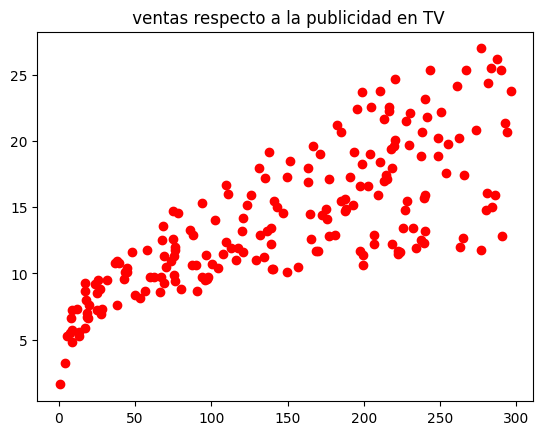

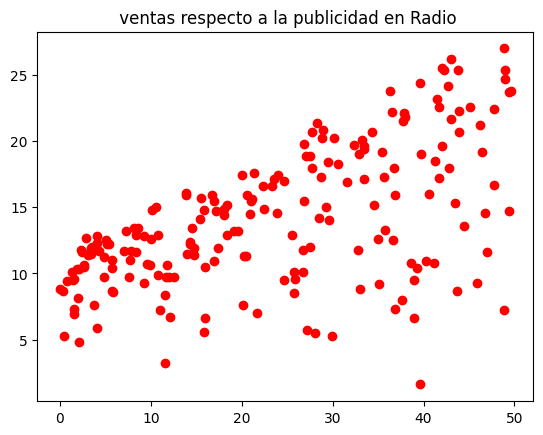

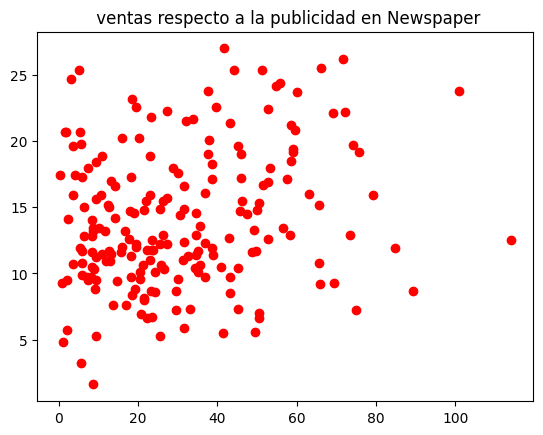

In [10]:
cols = ["TV", "Radio", "Newspaper"]
for col in cols:
    plt.plot(data[col], data["Sales"], "ro")
    plt.title(" ventas respecto a la publicidad en " + col )
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("../data/titanic3.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.info()


In [ ]:
data['survived'].value_counts()


In [ ]:
data['sex'].value_counts()


In [ ]:
data[['sex', 'survived']].groupby('sex').mean()


In [ ]:
data['pclass'].value_counts()


In [ ]:
data[['pclass', 'survived']].groupby('pclass').mean()


In [ ]:
data.groupby('pclass')['sex'].value_counts().sort_values(ascending=False)


In [ ]:
data[['sibsp', 'survived']].groupby('sibsp').mean().sort_values(by='survived', ascending=False)


In [ ]:
data[['parch', 'survived']].groupby('parch').mean().sort_values(by='survived', ascending=False)


In [ ]:
hist_age = sns.FacetGrid(data, col='survived')
hist_age.map(plt.hist, 'age', bins=10)

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['survived'] == 0], x='age', hue='sex', bins=20, label='No sobrevivio')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Histograma de edad de los no sobrevivientes')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['survived'] == 1], x='age', hue='sex', bins=20, label='Sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Histograma de edad de los sobrevivientes')
plt.show()


In [ ]:

grid = sns.FacetGrid(data, col='survived', row='pclass')
grid.map(plt.hist, 'age', bins=10)
grid.add_legend()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
ohe = one_hot_encoder.fit_transform(data[['sex']])
ohe = ohe.astype(int)


In [ ]:
one_hot_encoded_df = pd.DataFrame(ohe.toarray(), columns=one_hot_encoder.get_feature_names_out(['sex']))
one_hot_encoded_df


In [ ]:
data = pd.concat([data, one_hot_encoded_df], axis=1)
data

In [ ]:
data.drop('sex', axis=1, inplace=True)
data
     

In [ ]:
data.info()


In [ ]:
data.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
data.info()


In [ ]:
plt.boxplot(data['age'].dropna(), vert=False)
plt.show()
     

In [ ]:
plt.boxplot(data['fare'].dropna(), vert=False)
plt.show()

In [ ]:
data_copy = data.copy()


In [ ]:
data_copy['age'].fillna(data_copy['age'].mean(), inplace=True)
data_copy['fare'].fillna(data_copy['fare'].median(), inplace=True)

In [ ]:
data_copy.info()


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:


X = data_copy.drop(['survived'], axis=1).values
y = data_copy['survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data.shape)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
log_reg  = LogisticRegression(random_state=0, max_iter=400)
log_reg.fit(X_train, y_train)

In [ ]:
y_pred = log_reg.predict(X_test)


In [ ]:
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:

print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(log_reg.score(X_train, y_train) *100, 2))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)

In [ ]:

y_pred = cls.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])

In [ ]:
confusion_matrix(y_test, y_pred)


In [ ]:
print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(cls.score(X_train, y_train) *100, 2))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)


In [ ]:
y_pred = rfc.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])


In [ ]:
confusion_matrix(y_test, y_pred)


In [ ]:
print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(rfc.score(X_train, y_train) *100, 2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])
print(confusion_matrix(y_test, y_pred))
print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(knn.score(X_train, y_train) *100, 2))